# Inaugural Project

> **File description** 
> 1. This file contains the answers to the **inaugural project**. 
> 1. The `inauguralproject.py` file functions which are used multiple times in this notebook.

Imports and set magics:

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import my own code
import inauguralproject

# Import my own model
from HouseholdSpecializationModelny import HouseholdSpecializationModelClass
#Import the model with the version for question 5
from HouseholdSpecializationModelQ5 import HouseholdSpecializationModelClassQ5

# I create an instance of the model
model = HouseholdSpecializationModelClass()

# Question 1

#### Solving the model

I solve the model for different loops of $\alpha$ and $\sigma$ with the following values: $\alpha$={0.25,0.50,0.75} and $\sigma$={0.50,1.00,1.50}


In [5]:
# Firstly I define a and b:

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


In [6]:
#I define the alpha and sigma values:

alphaparameters = [0.25, 0.50, 0.75]
sigmaparameters = [0.5, 1.00, 1.5]


#I create a df for the values for the two parameters: 

dfparametervalues = pd.DataFrame(index=alphaparameters, columns=sigmaparameters)

#Create an empty list for the ratios:

ratios = []

#Create a loop over the solutions over the different parameter values:
for alpha in alphaparameters:
    for sigma in sigmaparameters:
        #I redefine the parameters:
        model.par.alpha = alpha
        model.par.sigma = sigma
        #I solve the model for each iteration of parameters:
        solution = model.solve_discrete()
        #I create the ratio for each iteration and add to the df:
        ratios = solution.HF/solution.HM
        dfparametervalues.loc[alpha, sigma] = ratios

#To print the parameter values:
print(dfparametervalues)



/Users/amalietokkesdal/Documents/GitHub/projects-2023-amalietokk/inauguralproject/HouseholdSpecializationModelny.py:64: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
/Users/amalietokkesdal/Documents/GitHub/projects-2023-amalietokk/inauguralproject/HouseholdSpecializationModelny.py:68: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50       1.0       1.0       1.0
0.75  1.833333      3.25  4.666667


#### I wish to visualise the results using a heatmap

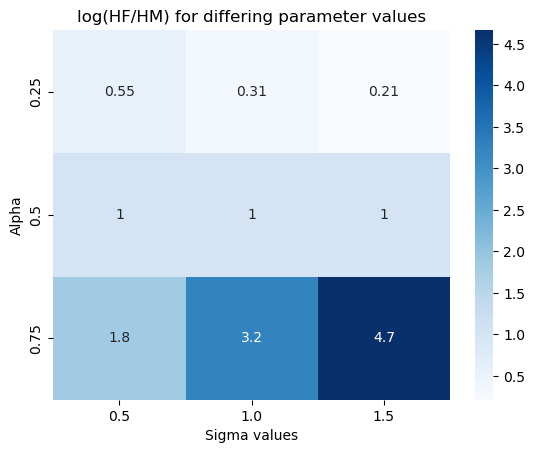

In [9]:
# Convert the data in the dataframe to floats
dfparametervalues = dfparametervalues.astype(float)

# I create the heatmap
#fig, ax = plt.subplots()
sns.heatmap(dfparametervalues, annot=True, cmap='Blues')

# I set the title and axes
plt.title('log(HF/HM) for differing parameter values')
plt.xlabel("Sigma values")
plt.ylabel("Alpha")

# Show the plot
plt.show()

### Conclusion

#### This shows that the higher the sigma and the alpha values are, the more females will work compared to males. So the more specialized females are in housework and vice versa, they will work more at home. Sigma is the elasticity of substitution and will be unchagnes 

In [11]:
#I reset the model parameters for the next questions: 

model.par.alpha = 0.5 
model.par.sigma = 1 

# Question 2

I solve the ratio of female to male housework for different levels of female wages, by using a loop through the different wages and storing the solutions. Afterwards I plot it in a lineplot. 

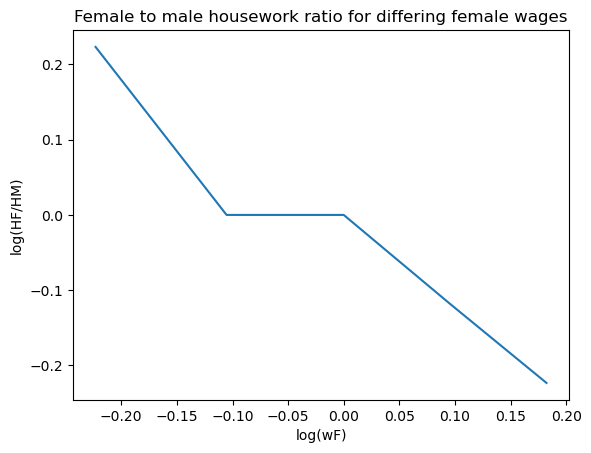

In [13]:
#I define different wage parameters
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]

# initialize dictionary to store results for each wage level for females
optHF = {}
optHM = {}

#I create a loop over the different wage levels:
for wF in wF_vector:
    # define the female wage
    model.par.wF = wF
    # solve the model
    opt = model.solve_discrete()
    optHF[wF] = opt.HF
    optHM[wF] = opt.HM
    
# I then store the results 
fig, ax = plt.subplots()
y = []
for wF in wF_vector:
    y.append(np.log(optHF[wF]/optHM[wF]))
ax.plot(np.log(wF_vector), y)
ax.set_xlabel("log(wF)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Female to male housework ratio for differing female wages")
plt.show()

### Conclusion

#### Therefore, the higher the wage for females, the less housework they will do in comparison to the male population, as the outside option is now of higher value.

# Question 3

When assuming continuity, I use the solve function and not the discrete function to find the optimal parameters. 

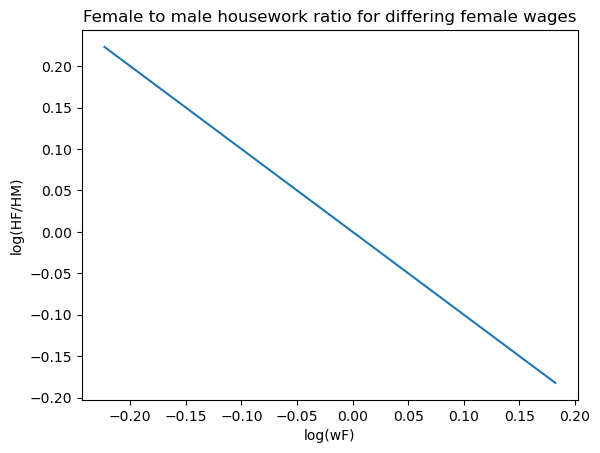

In [15]:
#I define different wage parameters
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]

# initialize dictionary to store results
optHF = {}
optHM = {}

for i,wF in enumerate(wF_vector):
    # set values of alpha and sigma in the model
    model.par.wF = wF
        
    # solve the model, but no longer using the discrete version
    opt = model.solve()
    optHF[wF] = opt.HF
    optHM[wF] = opt.HM

    model.sol.HF_vec[i] = opt.HF
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.LM_vec[i] = opt.LM

# plot the results
fig, ax = plt.subplots()
y = [np.log(optHF[wF]/optHM[wF]) for wF in wF_vector]
ax.plot(np.log(wF_vector),y)
ax.set_xlabel("log(wF)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Female to male housework ratio for differing female wages")
plt.show()

# Optimal, print the values with the functions below. 
#print(optHF)
#print(optHM)

### Conclusion

#### This is now a continuous line without kinks, as the actors in the model can choose the optimal time without having to decide in intervals. The figure shows a clear negative correlation betweem the female wage and the female to male housework ratio. 

# Question 4

I first find the minimzing values for alpha and sigma, by minimizing the errors, as defined in the definition 'estimate' in the attached py file.

In [9]:
#model = HouseholdSpecializationModelClass()

model.estimate()
print(f'Minimizing values for alpha and sigma = {model.estimate()}')

/Users/amalietokkesdal/Documents/GitHub/projects-2023-amalietokk/inauguralproject/HouseholdSpecializationModelny.py:172: RuntimeWarning: divide by zero encountered in true_divide
  y = np.log(sol.HF_vec/sol.HM_vec)


Minimizing values for alpha and sigma = (0.9820040156444783, 0.10001878847571266)


I then implement these values into the model, to find out how the model compares to Siminski and Yetsenga:

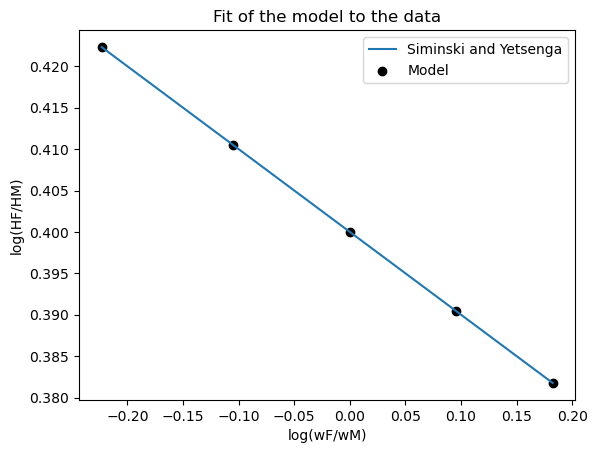

In [10]:
#I create empty lists

log_Hra = []
log_wra =[]

#I loop through the different wage levels
for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.alpha = 0.9820040156444783
    model.par.sigma = 0.10001878847571266
    optimum = model.solve()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hra = np.append(log_Hra, log_HFM)
    log_wF = np.log(wF/model.par.wM)
    log_wra = np.append(log_wra, log_wF)

# Siminski and Yetsenga's regression line is defined as follows
def f(log_wra):
    return 0.4 + (-0.1)*log_wra

# I create the figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
# plot the results of Siminski and Yetsenga
ax.plot(log_wra, f(log_wra), label="Siminski and Yetsenga")
# plot the results of the model
ax.scatter(log_wra, log_Hra, label="Model",color='black')

# alterations to figure
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Model fit")
ax.legend()
plt.show()

### Conclusion

#### Therefore we see that the estimate fits the Siminsky and Yetsenga predictions very well.

# Question 5

I try to implement an extension to the model, to get closer to the estimate results from the article, when introducing $\alpha$=0.5. To this end, I try to differentiate between preferences for household tasks between genders. Therefore heterogeneity. I assume a preference parameter, $\theta_M$ and $\theta_F$. This changes the disutility of household work such that the $Tf$ and $Tm$ are now:

$TM = LM+\theta_M*HM$

$TF = LF+\theta_F*HF$


To analyze the effects of this extension, I estimate the model using the same parameters as before, with $\alpha$=0.5. I assume that males have a lower preference for housework, so a larger disutility. Therefore I assume $\theta_M$=0.75 and $\theta_F$=1.0.

In [12]:
# I create an instance of the model
model = HouseholdSpecializationModelClassQ5()

I compare the fit of the extended model with the original model by computing the sum of squared differences between the predicted and actual log hours of female housework. 


In [13]:
model.estimate()
print(f'Minimizing values for alpha and sigma = {model.estimate()}')

Minimizing values for alpha and sigma = (0.535688374424353, 0.5108139890478923)


I then implement these values into the model, to find out how the model compares to Siminski and Yetsenga:

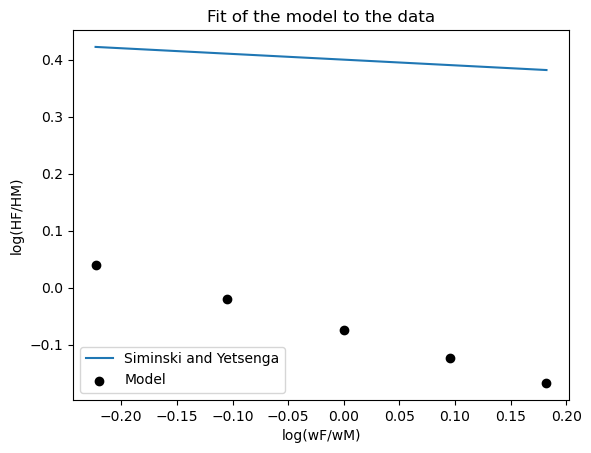

In [16]:
log_Hra = []
log_wra =[]

for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.alpha = 0.535688374424353
    model.par.sigma = 0.5108139890478923
    optimum = model.solve()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hra = np.append(log_Hra, log_HFM)
    log_wF = np.log(wF/model.par.wM)
    log_wra = np.append(log_wra, log_wF)

# Siminski and Yetsenga's regression line
def f(log_wra):
    return 0.4 +(-0.1)*log_wra

# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
# plot Siminski and Yetsenga's results as line
ax.plot(log_wra, f(log_wra), label="Siminski and Yetsenga")
# plot model's results as scatter dots
ax.scatter(log_wra, log_Hra, label="Model",color='black')

# alterations to figure
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Fit of the model to the data")
ax.legend()
plt.show()


### Conclusion

#### Here I see that it doesn't fit the model very well, but introducing preferences does fit the model slightly better than with alpha = 0.5 and without this extension.  So the results suggests that reverting back to the original alpha is not fitting the model very well, and that the preferences for household tasks differ between men and women, as this brings the results closer to the paper results. 

